<a href="https://colab.research.google.com/github/Shashikumar599/Houseprice_predictions/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [36]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns 


Import dataset

In [37]:
# import data from url into a dataframe
link="http://bit.ly/w-data"
dt=pd.read_csv(link)


In [38]:
dt

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
dt.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
dt.size

50

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


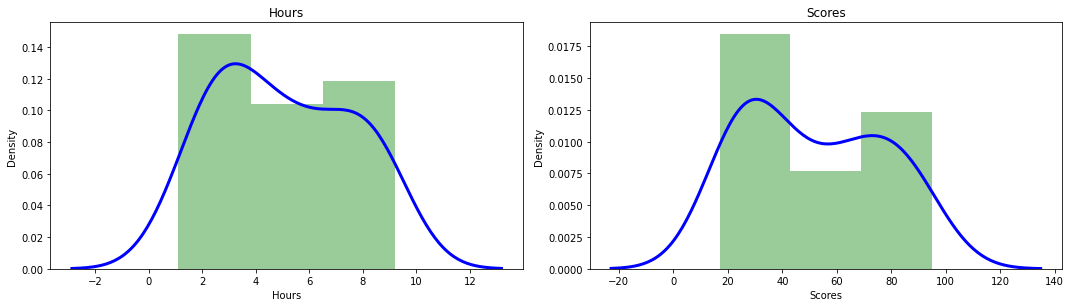

In [43]:
plt.figure(figsize=(15,60))
for i in range(len(dt.columns)):
  plt.subplot(15,2,i+1)
  sns.distplot(dt[dt.columns[i]],kde_kws={"color": "b","lw":3,"label":"KDE"},hist_kws={"color": "g"})
  plt.title(dt.columns[i])
plt.tight_layout()


converting to numpy arrays

In [44]:
X=dt.iloc[:,0].values
Y=dt.iloc[:,-1].values

In [45]:
X=X.reshape(-1,1)


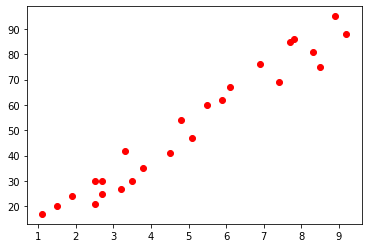

In [46]:
plt.scatter(X,Y,color='red')

Split into training and test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4)

Training model

In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred=regressor.predict(X_test)

Visualising the Training set results

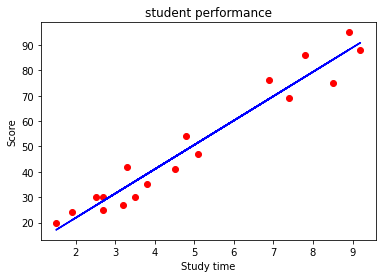

In [50]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('student performance')
plt.xlabel('Study time')
plt.ylabel('Score')
plt.show()

Visualising test set results

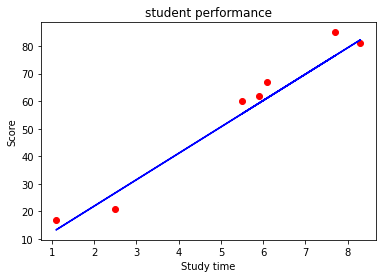

In [51]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('student performance')
plt.xlabel('Study time')
plt.ylabel('Score')
plt.show()

Comparing actual vs predicted

In [52]:
dc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [53]:
dc

,Actual,Predicted
0,62,59.251127
1,81,82.253831
2,60,55.417343
3,85,76.503155
4,17,13.245718
5,21,26.663963
6,67,61.168019


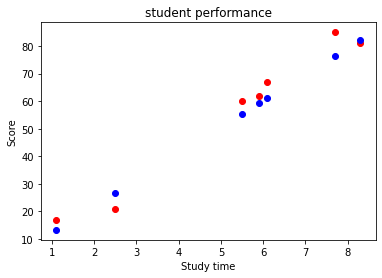

In [54]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'blue')
plt.title('student performance')
plt.xlabel('Study time')
plt.ylabel('Score')
plt.show()

Evaluation

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.618918849313658
